In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset

In [6]:
# Load the dataset
data = pd.read_csv('../data/bostonhousing.csv')

### Preprocess the Data

In [10]:
# Define features and target variable
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
target = 'medv'

# Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Evaluate the model using  Mean Squared Error (MSE)

In [11]:
# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'Linear Regression - Mean Squared Error: {mse_lin}')

Linear Regression - Mean Squared Error: 24.291119474973478


### Evaluate the model using R-squared.

In [12]:
# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'Linear Regression - R-squared: {r2_lin}')

Linear Regression - R-squared: 0.6687594935356326


### Ploting residuals to check the assumptions of linear regression.

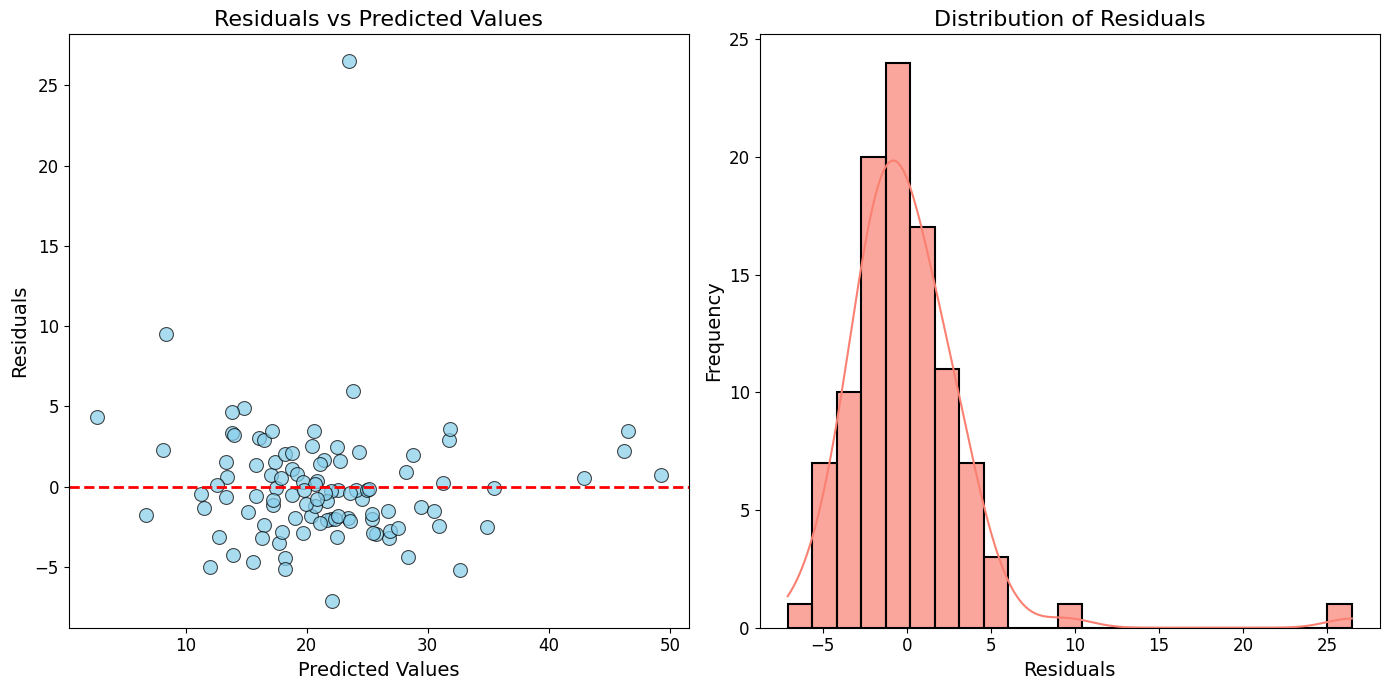

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Set a custom color palette
sns.set_palette("viridis")

# Plot residuals
plt.figure(figsize=(14, 7))

# Residuals vs Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals, color='skyblue', edgecolor='black', s=100, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Residuals distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='salmon', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Residuals', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Comparing model performance with different feature

In [22]:



# Function to train and evaluate the model
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Train and evaluate the model using the original feature set
X_original = data[features_original]
y = data['medv']
mse_original, r2_original = train_and_evaluate(X_original, y)

# Train and evaluate the model using the reduced feature set
X_reduced = data[features_reduced]
y = data['medv']
mse_reduced, r2_reduced = train_and_evaluate(X_reduced, y)

# Compare the performance metrics
print("Original Feature Set - Mean Squared Error: ", mse_original)
print("Original Feature Set - R-squared: ", r2_original)
print("Reduced Feature Set - Mean Squared Error: ", mse_reduced)
print("Reduced Feature Set - R-squared: ", r2_reduced)

Original Feature Set - Mean Squared Error:  24.291119474973513
Original Feature Set - R-squared:  0.668759493535632
Reduced Feature Set - Mean Squared Error:  27.03742014641156
Reduced Feature Set - R-squared:  0.6313101686394371


## Evaluating the impact of new features on model performance.

###  Define Original Features

In [ ]:
# Define the original features
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

### Create New Features

In [24]:
# Create polynomial features
data['rm_squared'] = data['rm'] ** 2
data['age_squared'] = data['age'] ** 2

# Create interaction terms
data['rm_age'] = data['rm'] * data['age']
data['tax_ptratio'] = data['tax'] * data['ptratio']

# Create a feature representing the total number of rooms
data['total_rooms'] = data['rm'] * data['ptratio']

# Create a feature representing the age of the house
data['house_age'] = 2023 - data['age']  # Assuming the data is from 2023

# Create bins for age
data['age_bin'] = pd.cut(data['age'], bins=[0, 20, 40, 60, 80, 100], labels=[1, 2, 3, 4, 5])

### Update Feature List

In [25]:
# Update the feature list with new features
new_features = features + ['rm_squared', 'age_squared', 'rm_age', 'tax_ptratio', 'total_rooms', 'house_age', 'age_bin']

### Train and Evaluate the Model with New Features

In [26]:
# Split the data into features (X) and target (y)
X = data[new_features]
y = data['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("New Features - Mean Squared Error: ", mse)
print("New Features - R-squared: ", r2)

New Features - Mean Squared Error:  14.100986861389929
New Features - R-squared:  0.8077149950035685
